### https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/
### https://cloud.tencent.com/developer/article/1492314
https://www.machinelearningplus.com/machine-learning/evaluation-metrics-classification-models-r

In [1]:
!which python

/Users/sunhongchao/anaconda3/envs/tf_base/bin/python


In [2]:
# load MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("Mnist_data/", one_hot=True)

# start tensorflow interactiveSession
import tensorflow as tf
sess = tf.InteractiveSession()

# weight initialization
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

# convolution
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
# pooling
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') # 步长为 2*2, 每次卷积，图像面积都变为原来的四分只一

# Create the model
# placeholder
x = tf.placeholder("float", [None, 784])
y_ = tf.placeholder("float", [None, 10])
# variables
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x,W) + b)

# first convolutinal layer
w_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, w_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
print('h_pool1', h_pool1.get_shape()) # (?, 14, 14, 32)

# second convolutional layer
w_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, w_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
print('h_pool2', h_pool2.get_shape()) # (?, 7, 7, 64)

# densely connected layer
w_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, w_fc1) + b_fc1)

# dropout
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# readout layer
w_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, w_fc2) + b_fc2)

# train and evaluate the model
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdagradOptimizer(1e-4).minimize(cross_entropy)

# accuracy
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess.run(tf.initialize_all_variables())
for i in range(2400):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_:batch[1], keep_prob:1.0})
        print("step %d, train accuracy %g" %(i, train_accuracy))
    train_step.run(feed_dict={x:batch[0], y_:batch[1], keep_prob:0.5})

print("test acc %g" % accuracy.eval(feed_dict={x:mnist.test.images, y_:mnist.test.labels, keep_prob:1.0}))

/Users/sunhongchao/anaconda3/envs/tf_base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sunhongchao/anaconda3/envs/tf_base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sunhongchao/anaconda3/envs/tf_base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sunhongchao/anacon

(?, 10)
[7, 2, 1, 0, 4, 1, 4, 5, 4, 9]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


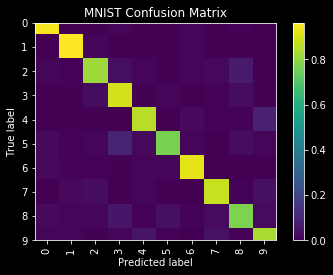

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

def convert_to_one_hot(y, C):
    return np.eye(C)[y.reshape(-1)].T
    
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

print(y_conv.get_shape())

outputs = y_conv.eval(feed_dict={x:mnist.test.images, y_:mnist.test.labels, keep_prob:1.0})



# y = np.array([1,2,3,4])
# convert_to_one_hot(y,5)
outputs = [ np.argmax(item) for item in outputs]
grounds = [ np.argmax(item) for item in mnist.test.labels ]

print(outputs[:10])
print(grounds[:10])

# confusion matrix


cm = sklearn.metrics.confusion_matrix(
    grounds,   # array, Gound true (correct) target values
    outputs,  # array, Estimated targets as returned by a classifier
    labels=None,  # array, List of labels to index the matrix.
    sample_weight=None  # array-like of shape = [n_samples], Optional sample weights
)

plot_confusion_matrix(cm, list(range(10)), "MNIST Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()


In [13]:
# p, r, f1

## p
print("precision")
from sklearn.metrics import precision_score
print(precision_score(grounds, outputs, average='macro'))  
print(precision_score(grounds, outputs, average='micro'))  
print(precision_score(grounds, outputs, average='weighted'))
print(precision_score(grounds, outputs, average=None))

## r
print("recall")
from sklearn.metrics import recall_score
print(recall_score(grounds, outputs, average='macro'))  
print(recall_score(grounds, outputs, average='micro'))  
print(recall_score(grounds, outputs, average='weighted'))
print(recall_score(grounds, outputs, average=None))

## pr 曲线

## f1
print("f1")
from sklearn.metrics import f1_score
print(f1_score(grounds, outputs, average='macro'))  
print(f1_score(grounds, outputs, average='micro'))  
print(f1_score(grounds, outputs, average='weighted'))
print(f1_score(grounds, outputs, average=None))

precision
0.8677014512094232
0.8682
0.8683172426624763
[0.90625    0.92608326 0.86680328 0.80463872 0.86714727 0.87261146
 0.90194076 0.89151874 0.81465517 0.82536585]
recall
0.8661222920110656
0.8682
0.8682
[0.94693878 0.96035242 0.81976744 0.89306931 0.85743381 0.76793722
 0.9217119  0.87937743 0.7761807  0.83845391]
f1
0.8661369569993976
0.8682
0.8675136070879941
[0.9261477  0.94290657 0.84262948 0.84655092 0.86226318 0.816935
 0.91171915 0.88540646 0.79495268 0.83185841]


![](https://www.machinelearningplus.com/wp-content/uploads/2017/09/Confusion-Matrix.png)

![metrics.png](https://blog-picture-bed.oss-cn-beijing.aliyuncs.com/blog/upload/metrics.png)



# sensitivity, specificity and detection rate
+ sensitivity = recall = A/(A + C)
+ specificity = B/(B+D)
+ detection rate = A/(A + B + C + D)
+ Prevalence = (A + C)/(A + B + C + D)
+ Detection Prevalence = (A + B)/(A + B + C + D)
+ Balance Accuracy = [sensitivity + specificity]/2
+ Precision = A/(A+B)
+ Recall = A/(A+C)
+ F1 score = 2 * Precision * Recall /(Precision + Recall)
+ Youden's J Index = sensitivity + specificity - 1


In [ ]:
# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# specificity = tn / (tn+fp)

# Cohen's Kappa
+ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html
+ This function computes Cohen’s kappa, a score that expresses the level of agreement between two annotators on a classification problem
+ 只返回一个数，没有具体类别的信息

In [15]:
print(sklearn.metrics.cohen_kappa_score(grounds, outputs, labels=None, weights=None, sample_weight=None))

0.8534725721889386


# Kolmogorov Smirnov

- Kolmogorov-Smirnov是比较一个频率分布f(x)与理论分布g(x)或者两个观测值分布的检验方法
- marketing campaigns and ads click predictions
- K-S是衡量正负例分布之间分离程度的指标
- K-S将介于0和100之间，并且值越高，模型在区分正负例情况时越好

In [16]:
import pandas as pd

def ks_statistic(Y,Y_hat):
    data = {"Y":Y,"Y_hat":Y_hat}
    df = pd.DataFrame(data)
    bins = np.array([-0.1,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    category = pd.cut(df["Y_hat"],bins=bins)
    category = category.sort_values()
    #max_index = len(np.unique(df["Y_hat"]))
    Y = df.ix[category.index,:]['Y']
    Y_hat = df.ix[category.index,:]['Y_hat']
    df2 = pd.concat([Y,Y_hat],axis=1)
    df3 = pd.pivot_table(df2,values = ['Y_hat'],index ='Y_hat',columns='Y',aggfunc=len,fill_value=0)
    df4 = np.cumsum(df3)
    df5 = df4/df4.iloc[:,1].max()
    ks = max(abs(df5.iloc[:,0] - df5.iloc[:,1]))
    return ks/len(bins)

print(ks_statistic(grounds, outputs))

0.07432919503404084
/Users/sunhongchao/anaconda3/envs/tf_base/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/sunhongchao/anaconda3/envs/tf_base/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/Users/sunhongchao/anaconda3/envs/tf_base/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexi

# ROC
+ 二分类

# Gini Coefficient
- Gini Coefficient = (2 * AUROC) - 1

# Concordance and Discordance

# Somers-D statistic
+ Somers D = (#Concordant Pairs - #Discordant Pairs - #Ties) / Total Pairs

# Gain and Lift Charts
- https://www.cnblogs.com/bicoffee/p/4390614.html

# Log Loss

# Root Mean Squared Error
- 只有一个数，不能判断类别